In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/jinwo/Downloads/kc_house_data.csv", index_col=0)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


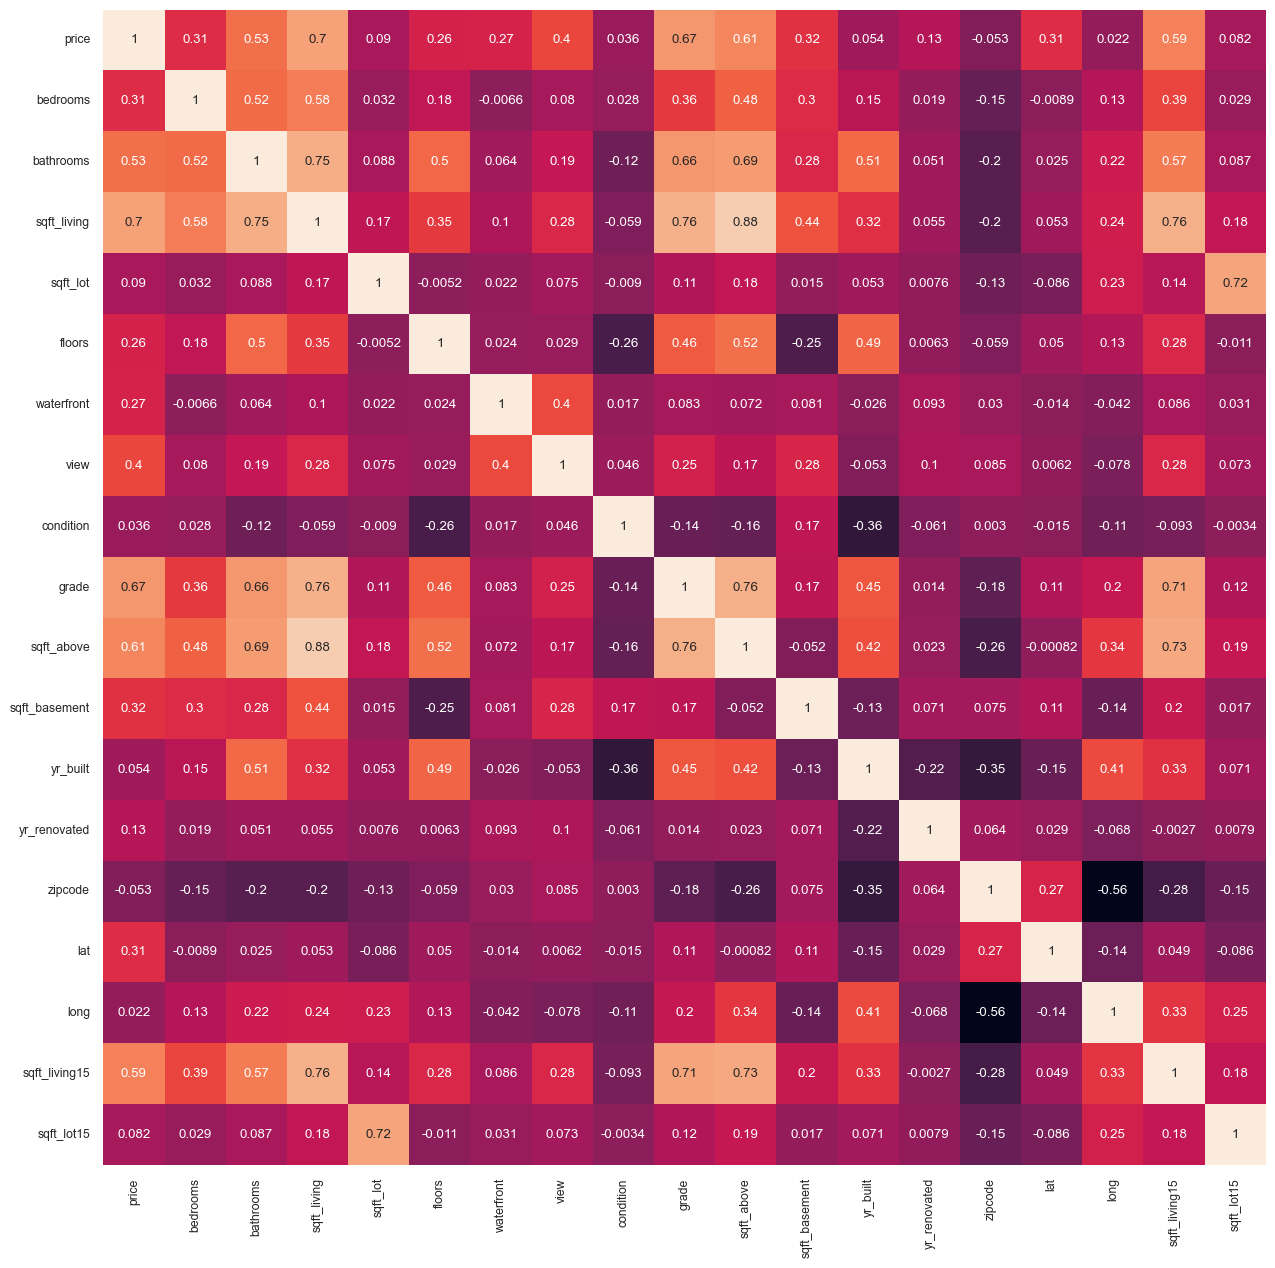

In [8]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = df.select_dtypes(include=['number']).corr()

#히트맵
plt.figure(figsize=(15,15))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
X = df.drop(columns=['price', 'date'],axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
y = df['price']
y.head()

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
Name: price, dtype: float64

In [73]:
Y = pd.get_dummies(y).values

In [75]:
X = X.values

In [77]:
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [79]:
y

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
                ...   
263000018     360000.0
6600060120    400000.0
1523300141    402101.0
291310100     400000.0
1523300157    325000.0
Name: price, Length: 21613, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 18), (17290, 4028), (4323, 18), (4323, 4028))

In [89]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(18,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\jinwo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 861179.6875 - mse: 861179.6875 - val_loss: 100728.3984 - val_mse: 100728.3984
Epoch 2/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 30069.4277 - mse: 30069.4277 - val_loss: 2136.3574 - val_mse: 2136.3574
Epoch 3/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13879.2988 - mse: 13879.2988 - val_loss: 3796.6509 - val_mse: 3796.6509
Epoch 4/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5165.5986 - mse: 5165.5986 - val_loss: 1036.6249 - val_mse: 1036.6249
Epoch 5/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 518.4530 - mse: 518.4530 - val_loss: 335.2125 - val_mse: 335.2125
Epoch 6/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 387.1936 - mse: 387.1936 - val_loss: 18.0279 - val_mse: 18.0279
Epoch 7/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 164.6638 - mse: 164.6638 - val_loss: 21.8657 - val_mse: 21.8657
Epoch 8/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 380.7888 - mse: 380.7888 - val_los

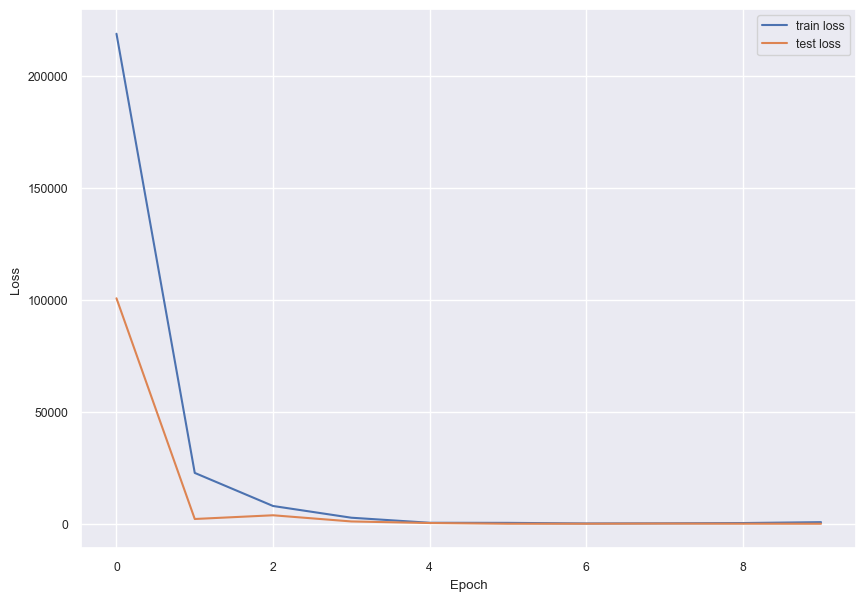

In [93]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2067 - mse: 4.2067     


[9.803873062133789, 9.803873062133789]